In [3]:
import os
os.chdir("/home/tmp_user/scikit-learn_bench/")

In [54]:
ls |grep log

16_1.log
16_2.log
16_3.log
1.log
2.log
3.log
64_1.log
64_2.log
64_3.log
64t_1.log
64t_2.log
64t_3.log
64t_4.log
64t_5.log
64t_6.log
64t_7.log


In [49]:
from curses.ascii import isdigit
from signal import valid_signals


logs = ["64t_7.log", "64t_6.log","64t_5.log","64t_4.log", "64t_3.log","64t_2.log","64t_1.log"]


def get_result_dict(file_name):
    result_dict ={}
    with open(file_name) as f:
        lines = f.readlines()
        for line in lines:
            line = line.strip()
            if line[0].isalpha():
                key = line
            elif line[0].isdigit():
                value = line
                result_dict[key] = value
    return result_dict

results = list()
for log in logs:
    results.append(get_result_dict(log))

results

[{'using': '63',
  'dur_sample_median': '107036',
  'dur_reduce_median': '29484',
  'dur_sample_index': '2291',
  'dur_reduce_index': '442404',
  'dur_select_dimension': '54092',
  'dur_parallel_median': '1979035',
  'dur_parallel_index': '1067029',
  'buildFirstPartOfKDTree': '3417074',
  'dur_thread_second': '6707182',
  'dur_reduce_second': '150',
  'buildSecondPartOfKDTree': '6707498',
  'start rearrange()reaaragePoints': '1936311',
  'compute()': '12486397',
  'duration': '39550191.87927246',
  'bigdata/synthetic-classification-10-X': '250000x16_256_tile.npy'},
 {'using': '54',
  'dur_sample_median': '104870',
  'dur_reduce_median': '23096',
  'dur_sample_index': '1876',
  'dur_reduce_index': '445990',
  'dur_select_dimension': '50489',
  'dur_parallel_median': '1995131',
  'dur_parallel_index': '1073770',
  'buildFirstPartOfKDTree': '3436943',
  'dur_thread_second': '6561334',
  'dur_reduce_second': '203',
  'buildSecondPartOfKDTree': '6561691',
  'start rearrange()reaaragePoints

In [59]:
logs_sep_rep = ["9_tune_sep_rep.log", "18_tune_sep_rep.log","27_tune_sep_rep.log","36_tune_sep_rep.log","45_tune_sep_rep.log","54_tune_sep_rep.log","63_tune_sep_rep.log","72_tune_sep_rep.log"]
results_sep_rep = list()
for log in logs_sep_rep:
    results_sep_rep.append(get_result_dict(log))

results_sep_rep

[{'using': '9',
  'dur_sample_median': '8781',
  'dur_reduce_median': '289',
  'dur_sample_index': '502',
  'dur_reduce_index': '288015',
  'dur_select_dimension': '9191',
  'dur_parallel_median': '1608901',
  'dur_parallel_index': '678680',
  'buildFirstPartOfKDTree': '2651801',
  'dur_thread_second': '30994013',
  'dur_reduce_second': '196',
  'buildSecondPartOfKDTree': '30994453',
  'start rearrange()reaaragePoints': '3586924',
  'compute()': '37799510',
  'duration': '64799403.66744995',
  'bigdata/synthetic-classification-10-X': '250000x16_256_tile.npy'},
 {'using': '18',
  'dur_sample_median': '16060',
  'dur_reduce_median': '972',
  'dur_sample_index': '736',
  'dur_reduce_index': '299690',
  'dur_select_dimension': '7574',
  'dur_parallel_median': '1169046',
  'dur_parallel_index': '692698',
  'buildFirstPartOfKDTree': '2189785',
  'dur_thread_second': '15455875',
  'dur_reduce_second': '47',
  'buildSecondPartOfKDTree': '15456032',
  'start rearrange()reaaragePoints': '2099292

In [60]:
logs_sep = ["9_tune_sep.log", "18_tune_sep.log","27_tune_sep.log","36_tune_sep.log","45_tune_sep.log","54_tune_sep.log","63_tune_sep.log","72_tune_sep.log"]
results_sep = list()
for log in logs_sep:
    results_sep.append(get_result_dict(log))

results_sep

[{'using': '9',
  'dur_sample_median': '7301',
  'dur_reduce_median': '263',
  'dur_sample_index': '458',
  'dur_reduce_index': '266145',
  'dur_select_dimension': '9711',
  'dur_parallel_median': '1513067',
  'dur_parallel_index': '659133',
  'buildFirstPartOfKDTree': '2520473',
  'dur_thread_second': '31432581',
  'dur_reduce_second': '113',
  'buildSecondPartOfKDTree': '31432842',
  'start rearrange()reaaragePoints': '3564385',
  'compute()': '38080261',
  'duration': '65274630.7849884',
  'bigdata/synthetic-classification-10-X': '250000x16_256_tile.npy'},
 {'using': '18',
  'dur_sample_median': '17381',
  'dur_reduce_median': '991',
  'dur_sample_index': '958',
  'dur_reduce_index': '324611',
  'dur_select_dimension': '17695',
  'dur_parallel_median': '1227376',
  'dur_parallel_index': '729929',
  'buildFirstPartOfKDTree': '2303514',
  'dur_thread_second': '15324990',
  'dur_reduce_second': '201',
  'buildSecondPartOfKDTree': '15325358',
  'start rearrange()reaaragePoints': '219219

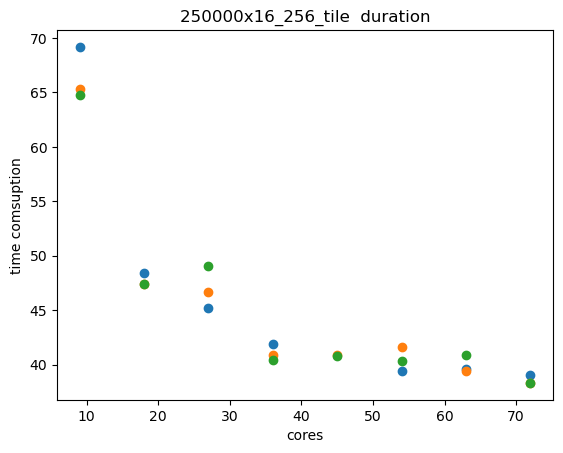

In [83]:
from distutils import core
import matplotlib.pyplot as plt
import numpy as np

key = "duration"

def visualize_scaling(key_time, results, core_key="using", title=""):
    cores = []
    time = []
    for result in results:
        cores.append(int(result[core_key]))
        time.append(float(result[key_time]))

    plt.scatter(cores, np.array(time)/1000000)
    plt.xlabel("cores")
    plt.ylabel("time comsuption")
    plt.title( title + " " + key)

visualize_scaling(key, results, title="250000x16_256_tile ")
visualize_scaling(key, results_sep, title="250000x16_256_tile ")
visualize_scaling(key, results_sep_rep, title="250000x16_256_tile ")

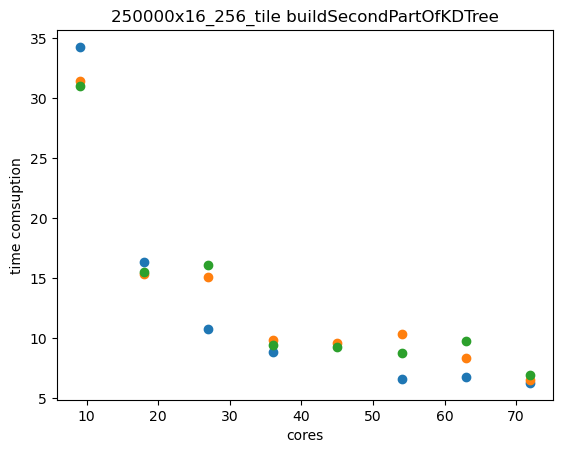

In [64]:
from distutils import core
import matplotlib.pyplot as plt
import numpy as np

key = "buildSecondPartOfKDTree"

def visualize_scaling(key_time, results, core_key="using"):
    cores = []
    time = []
    for result in results:
        cores.append(int(result[core_key]))
        time.append(float(result[key_time]))

    plt.scatter(cores, np.array(time)/1000000)
    plt.xlabel("cores")
    plt.ylabel("time comsuption")
    plt.title("250000x16_256_tile " + key)

visualize_scaling(key, results)
visualize_scaling(key, results_sep)
visualize_scaling(key, results_sep_rep)

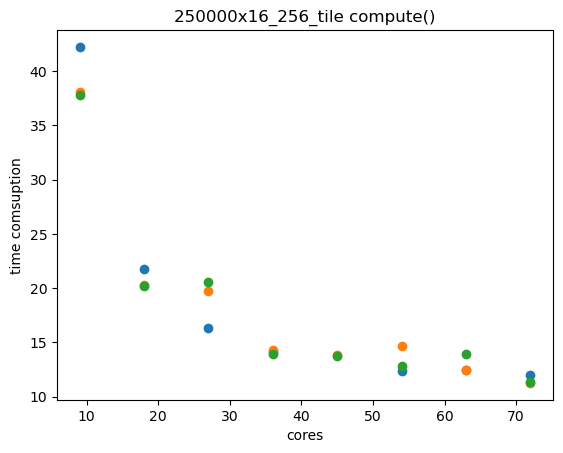

In [81]:
from distutils import core
import matplotlib.pyplot as plt
import numpy as np

key = "compute()"

def visualize_scaling(key_time, results, core_key="using"):
    cores = []
    time = []
    for result in results:
        cores.append(int(result[core_key]))
        time.append(float(result[key_time]))

    plt.scatter(cores, np.array(time)/1000000)
    plt.xlabel("cores")
    plt.ylabel("time comsuption")
    plt.title("250000x16_256_tile " + key)

visualize_scaling(key, results)
visualize_scaling(key, results_sep)
visualize_scaling(key, results_sep_rep)

In [76]:
logs_sep_1_250K = ["9_tune_sep_1_250K.log", "18_tune_sep_1_250K.log","27_tune_sep_1_250K.log","36_tune_sep_1_250K.log","45_tune_sep_1_250K.log","54_tune_sep_1_250K.log","63_tune_sep_1_250K.log","72_tune_sep_1_250K.log"]
results_sep_1_250K = list()
for log in logs_sep_1_250K:
    results_sep_1_250K.append(get_result_dict(log))


In [77]:
logs_sep_3_250K = ["9_tune_sep_3_250K.log", "18_tune_sep_3_250K.log","27_tune_sep_3_250K.log","36_tune_sep_3_250K.log","45_tune_sep_3_250K.log","54_tune_sep_3_250K.log","63_tune_sep_3_250K.log","72_tune_sep_3_250K.log"]
results_sep_3_250K = list()
for log in logs_sep_3_250K:
    results_sep_3_250K.append(get_result_dict(log))

In [78]:
logs_sep_3_250K_rep = ["9_tune_sep_3_250K_rep.log", "18_tune_sep_3_250K_rep.log","27_tune_sep_3_250K_rep.log","36_tune_sep_3_250K_rep.log",
                       "45_tune_sep_3_250K_rep.log","54_tune_sep_3_250K_rep.log","63_tune_sep_3_250K_rep.log","72_tune_sep_3_250K_rep.log"]
results_sep_3_250K_rep = list()
for log in logs_sep_3_250K_rep:
    results_sep_3_250K_rep.append(get_result_dict(log))

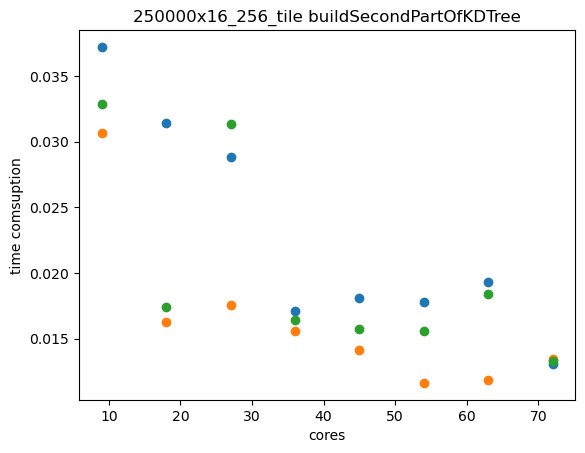

In [80]:
visualize_scaling(key, results_sep_3_250K_rep, title="250K")
visualize_scaling(key, results_sep_3_250K, title="250K")
visualize_scaling(key, results_sep_1_250K, title="250K")